## Tópico Complementarar Módulo 13: PPS - Predictive Power Score 

In [2]:
# AED
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## machine learning
import ppscore as pps
from sklearn.linear_model import LinearRegression, LogisticRegression

#### Carga e Preparação de Dados - Regressão

Vamos listar as bibliotecas necessárias e criar um arquivo chamado pps. Vamos importar as bibliotecas necessárias, como pandas, seaborn, ppscore, matplotlib, e dois modelos do sklearn. Em seguida, vamos carregar e visualizar os dados de regressão, usando o dataset de colesterol. Vamos transformar as variáveis categóricas em numéricas usando o conceito de One Hot Encoding. Vamos ajustar o DataFrame, removendo a coluna ID e aplicando o One Hot Encoding nas variáveis categóricas. O DataFrame estará pronto para a exploração usando o PPS e a correlação.

In [3]:
# carregar os dados - regressão
df_pps = pd.read_csv('../../datasets/dataset_colesterol.csv')

# visualizar estrutura de dados
df_pps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  1000 non-null   int64  
 1   Grupo Sanguíneo     996 non-null    object 
 2   Fumante             997 non-null    object 
 3   Nível de Atividade  996 non-null    object 
 4   Idade               997 non-null    float64
 5   Peso                997 non-null    float64
 6   Altura              997 non-null    float64
 7   Colesterol          1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


In [4]:
# exibir dataframe
df_pps.head(6)

,Id,Grupo Sanguíneo,Fumante,Nível de Atividade,Idade,Peso,Altura,Colesterol
0,1,B,Sim,Baixo,33.0,85.1,186.0,199.63
1,2,A,Não,Moderado,68.0,105.0,184.0,236.98
2,3,O,Não,Alto,25.0,64.8,180.0,161.79
3,4,A,Não,Alto,43.0,120.2,167.0,336.24
4,5,AB,Não,Baixo,79.0,88.5,175.0,226.23
5,6,B,Não,Baixo,68.0,66.8,170.0,185.31


In [5]:
# detectar quantidade valores ausentes (nulos) por coluna
df_pps.isna().sum()

Id                    0
Grupo Sanguíneo       4
Fumante               3
Nível de Atividade    4
Idade                 3
Peso                  3
Altura                3
Colesterol            0
dtype: int64

In [6]:
# coletar medidas de variáveis categóricas
moda_grupo_sanguineo = df_pps["Grupo Sanguíneo"].mode()
moda_fumante = df_pps["Fumante"].mode()
moda_nivel_atividade_fisica = df_pps["Nível de Atividade"].mode(
)

In [7]:
# coletar medidade de variáveis numéricas
mediana_idade = df_pps["Idade"].median()
mediana_peso = df_pps["Peso"].median()
mediana_altura = df_pps["Altura"].median()

In [8]:
# imputar valores ausentes
df_pps.fillna(
    value={
        "Grupo Sanguíneo": moda_grupo_sanguineo[0],
        "Fumante": moda_fumante[0],
        "Nível de Atividade": moda_nivel_atividade_fisica[0],
        "Idade": mediana_idade,
        "Peso": mediana_peso,
        "Altura": mediana_altura,
    },
    inplace=True,
)

In [9]:
# detectar quantidade valores ausentes (nulos) por coluna
df_pps.isna().sum()

Id                    0
Grupo Sanguíneo       0
Fumante               0
Nível de Atividade    0
Idade                 0
Peso                  0
Altura                0
Colesterol            0
dtype: int64

In [10]:
# ajustar dataframe
df_pps.drop("Id", axis=1, inplace=True)

# aplicar OneHotEnconding nas variáveis categóricas
df_pps = pd.get_dummies(
    df_pps, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'])

# exibir dataframe atualizado
df_pps.head(6)

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
0,33.0,85.1,186.0,199.63,0,0,1,0,0,1,0,1,0
1,68.0,105.0,184.0,236.98,1,0,0,0,1,0,0,0,1
2,25.0,64.8,180.0,161.79,0,0,0,1,1,0,1,0,0
3,43.0,120.2,167.0,336.24,1,0,0,0,1,0,1,0,0
4,79.0,88.5,175.0,226.23,0,1,0,0,1,0,0,1,0
5,68.0,66.8,170.0,185.31,0,0,1,0,1,0,0,1,0


#### PPS e Matriz de Correlação - Regressão

Vamos aprender como calcular o PPS (Predictive Power Score) entre variáveis de um DataFrame. O PPS é uma métrica que mede a capacidade de uma variável prever outra, utilizando um modelo de regressão. Primeiro, calculamos o PPS para todas as combinações de variáveis. Em seguida, ajustamos a matriz do PPS para facilitar a visualização. Por fim, plotamos a matriz de PPS utilizando um heatmap do Seaborn. Comparamos os resultados do PPS com a matriz de correlação para identificar relações lineares e não lineares entre as variáveis.

In [11]:
# calcular PPS entre as variáveis
pps_matrix_reg = pps.matrix(df_pps)
pps_matrix_reg.head(10)

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Idade,Idade,1.0,predict_itself,True,None,0.0000,1.000000,None
1,Idade,Peso,0.0,regression,True,mean absolute error,16.9491,17.788764,DecisionTreeRegressor()
2,Idade,Altura,0.0,regression,True,mean absolute error,7.6700,7.855300,DecisionTreeRegressor()
3,Idade,Colesterol,0.0,regression,True,mean absolute error,40.1725,42.081644,DecisionTreeRegressor()
4,Idade,Grupo Sanguíneo_A,0.0,regression,True,mean absolute error,0.2660,0.389833,DecisionTreeRegressor()
5,Idade,Grupo Sanguíneo_AB,0.0,regression,True,mean absolute error,0.2680,0.391616,DecisionTreeRegressor()
6,Idade,Grupo Sanguíneo_B,0.0,regression,True,mean absolute error,0.1390,0.240683,DecisionTreeRegressor()
7,Idade,Grupo Sanguíneo_O,0.0,regression,True,mean absolute error,0.3270,0.435410,DecisionTreeRegressor()
8,Idade,Fumante_Não,0.0,regression,True,mean absolute error,0.3660,0.463013,DecisionTreeRegressor()
9,Idade,Fumante_Sim,0.0,regression,True,mean absolute error,0.3660,0.463013,DecisionTreeRegressor()


In [12]:
# calcular matrix de correlação
corr_matrix_reg = df_pps.corr()
corr_matrix_reg

,Idade,Peso,Altura,Colesterol,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Fumante_Não,Fumante_Sim,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado
Idade,1.000000,-0.004697,0.007409,-0.016701,0.051279,-0.057630,0.020943,-0.009333,-0.012569,0.012569,0.065062,-0.009911,-0.052571
Peso,-0.004697,1.000000,0.378315,0.915474,0.213933,0.132702,-0.052908,-0.287779,-0.378140,0.378140,-0.278474,0.288254,-0.041080
Altura,0.007409,0.378315,1.000000,0.013554,-0.003779,-0.049498,0.024656,0.032111,0.003231,-0.003231,-0.016314,0.034393,-0.021356
Colesterol,-0.016701,0.915474,0.013554,1.000000,0.219684,0.181817,-0.072996,-0.324754,-0.422522,0.422522,-0.303478,0.305283,-0.035186
Grupo Sanguíneo_A,0.051279,0.213933,-0.003779,0.219684,1.000000,-0.364254,-0.241879,-0.419623,-0.064101,0.064101,-0.098421,0.062261,0.028362
Grupo Sanguíneo_AB,-0.057630,0.132702,-0.049498,0.181817,-0.364254,1.000000,-0.243118,-0.421772,-0.102701,0.102701,-0.065431,0.071872,-0.014138
Grupo Sanguíneo_B,0.020943,-0.052908,0.024656,-0.072996,-0.241879,-0.243118,1.000000,-0.280074,0.041249,-0.041249,0.046719,-0.051206,0.009973
Grupo Sanguíneo_O,-0.009333,-0.287779,0.032111,-0.324754,-0.419623,-0.421772,-0.280074,1.000000,0.126924,-0.126924,0.120027,-0.088741,-0.020721
Fumante_Não,-0.012569,-0.378140,0.003231,-0.422522,-0.064101,-0.102701,0.041249,0.126924,1.000000,-1.000000,0.123869,-0.145168,0.036619
Fumante_Sim,0.012569,0.378140,-0.003231,0.422522,0.064101,0.102701,-0.041249,-0.126924,-1.000000,1.000000,-0.123869,0.145168,-0.036619


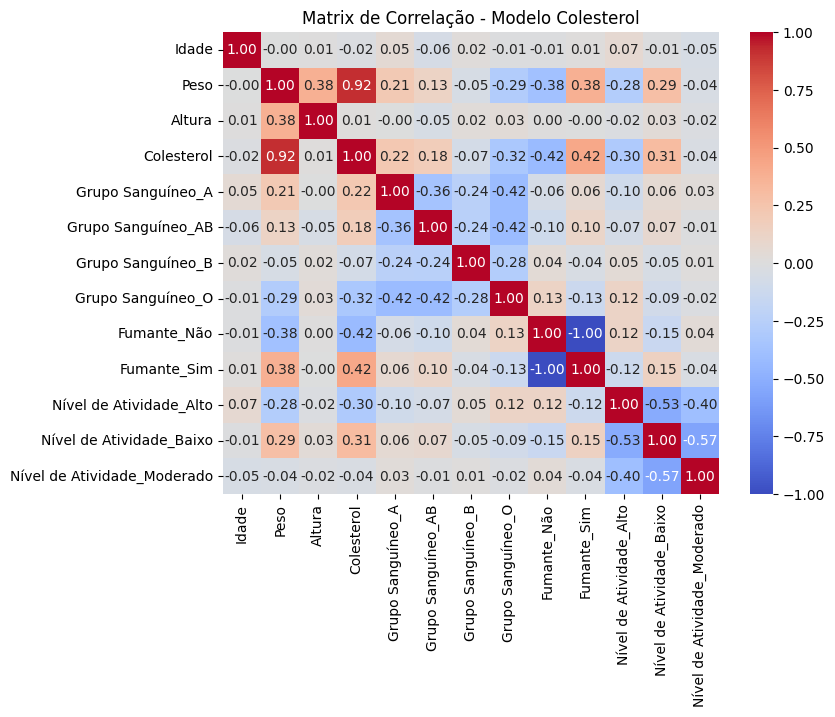

In [13]:
# plotar matrix de Correlação
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_reg, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrix de Correlação - Modelo Colesterol")
plt.show()

In [14]:
pps_matrix_reg_pivot = pps_matrix_reg[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values= 'ppscore')
pps_matrix_reg_pivot

x,Altura,Colesterol,Fumante_Não,Fumante_Sim,Grupo Sanguíneo_A,Grupo Sanguíneo_AB,Grupo Sanguíneo_B,Grupo Sanguíneo_O,Idade,Nível de Atividade_Alto,Nível de Atividade_Baixo,Nível de Atividade_Moderado,Peso
y,,,,,,,,,,,,,
Altura,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
Colesterol,0.00000,1.000000,0.108793,0.108793,0.033112,0.024919,0.002713,0.067220,0.0,0.069186,0.052765,0.00000,0.486273
Fumante_Não,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
Fumante_Sim,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
Grupo Sanguíneo_A,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
Grupo Sanguíneo_AB,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
Grupo Sanguíneo_B,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.00000,0.000000
Grupo Sanguíneo_O,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.00000,0.000000
Idade,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.001757,0.000000,0.00083,0.000000


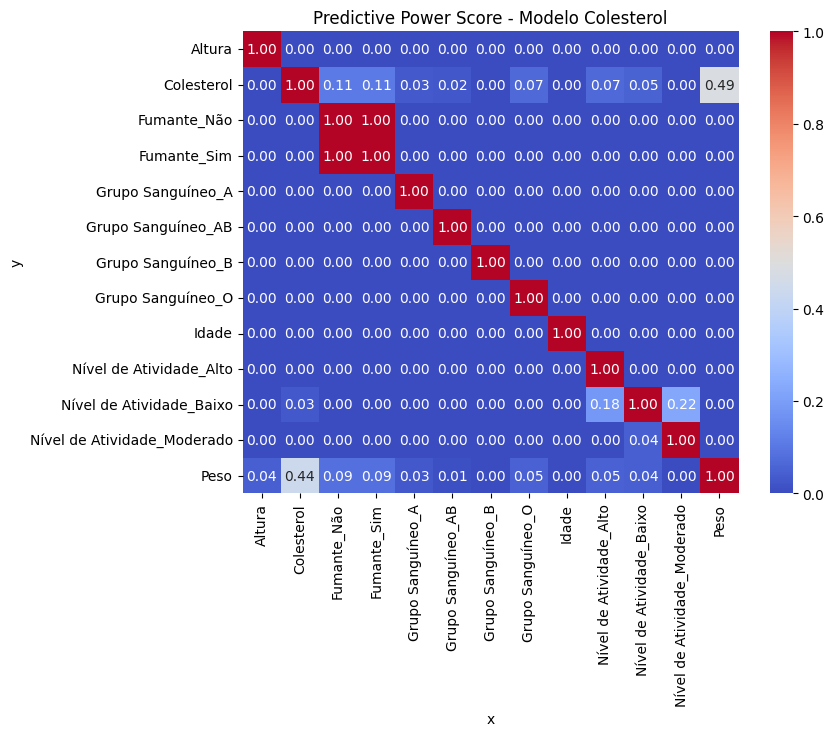

In [15]:
# plotar matrix de PPS
plt.figure(figsize=(8, 6))
sns.heatmap(pps_matrix_reg_pivot, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Predictive Power Score - Modelo Colesterol")
plt.show()

#### Feature Importance - Regressão

Abordaremos o modelo de classificação, além de explorar um tópico relacionado à regressão. Vamos rodar um modelo de regressão linear para avaliar os coeficientes gerados e identificar quais são os mais importantes. Para isso, vamos separar os dados em treino e teste e treinar o modelo. Em seguida, vamos capturar a importância das features usando os coeficientes do modelo e criar um gráfico de barras horizontais para visualizar essa importância. Com isso, podemos identificar as features mais relevantes para a regressão. É importante analisar essas informações para ajustar o modelo e fazer predições mais precisas. No próximo vídeo, vamos começar a explorar o PPS para um modelo de classificação.

In [16]:
# separar x e y
X = df_pps.drop('Colesterol', axis=1)
y = df_pps['Colesterol']

# treinar modelo de regressão linar múltipla
model_linearm_colesterol = LinearRegression()
model_linearm_colesterol.fit(X, y)

LinearRegression()

Text(0.5, 1.0, 'Importâncias das Features na Regressão Linear')

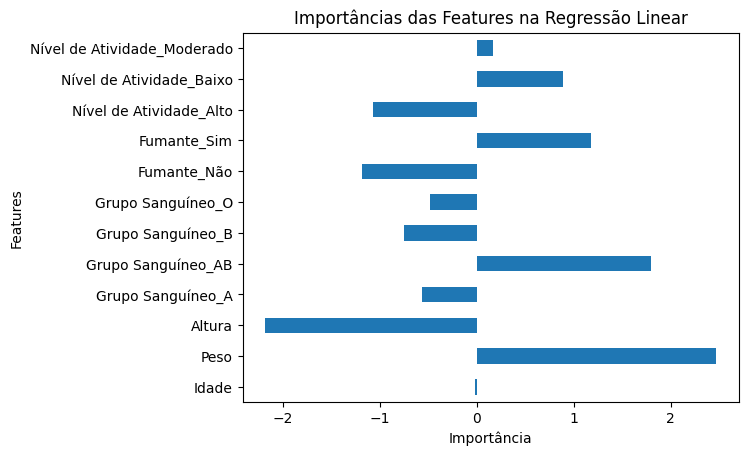

In [17]:
# Avaliar a importância das features com base nos coeficientes de modelo
feat_importance_reg = pd.Series(model_linearm_colesterol.coef_, index=X.columns )
feat_importance_reg.plot(kind='barh')
plt.xlabel("Importância")
plt.ylabel("Features")
plt.title("Importâncias das Features na Regressão Linear")

#### Carga e Preparação de Dados - Classificação

Daremos continuidade ao tópico de PPS (Predictive Power Score) e aplicá-lo-emos a um modelo de classificação. Utilizaremos como referência o modelo de regressão logística que construímos anteriormente, no qual analisamos a qualidade de frutas. Vamos carregar o modelo e o conjunto de dados, ajustando o DataFrame para que possamos calcular o PPS e a matriz de correlação. Faremos algumas transformações, como remover colunas desnecessárias e converter a variável "4" em uma variável numérica binária. Com isso, estaremos prontos para prosseguir com o cálculo do PPS e a análise da matriz de correlação.

In [18]:
# carregar dataset
df_pps_2 = pd.read_csv('../../datasets/dataset_fruit_quality.csv') 
df_pps_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   int64  
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
 8   Quality      4000 non-null   object 
dtypes: float64(7), int64(1), object(1)
memory usage: 281.4+ KB


In [19]:
# Ajustar Dataframe

# remover coluna de id
df_pps_2.drop('A_id', axis=1, inplace=True)

df_pps_2['Quality'] = (df_pps_2['Quality'] == 'good').astype(int)

df_pps_2.head(6)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1
5,-3.425400,-1.409082,-1.913511,-0.555775,-3.853071,1.914616,-2.981523,0


#### PPS, Matriz de Correlação e Feature Importance - Classificação

Continuaremos nosso projeto de PPS (Power Predictive Score) e prepararemos os dados para o modelo de classificação. Adaptamos o código que já havíamos utilizado para regressão e calculamos o PPS para a classificação. Em seguida, criamos uma matriz de correlação e treinamos o modelo de regressão logística. Observamos que, no caso da classificação, não há variáveis que possam prever com precisão a qualidade das frutas. Comparamos os resultados do PPS com a matriz de correlação e os coeficientes do modelo. Concluímos que o PPS é uma ferramenta útil para validar relações não lineares, mas deve ser usado em conjunto com métodos tradicionais como a correlação e os coeficientes do modelo.

In [20]:
# calcular PPS entre as variáveis
pps_matrix_class = pps.matrix(df_pps_2)
pps_matrix_class

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,Size,Size,1.000000,predict_itself,True,None,0.000000,1.000000,None
1,Size,Weight,0.000000,regression,True,mean absolute error,1.255674,1.814665,DecisionTreeRegressor()
2,Size,Sweetness,0.000000,regression,True,mean absolute error,1.536197,2.078989,DecisionTreeRegressor()
3,Size,Crunchiness,0.000000,regression,True,mean absolute error,1.095270,1.538555,DecisionTreeRegressor()
4,Size,Juiciness,0.000000,regression,True,mean absolute error,1.542205,2.160981,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
59,Quality,Crunchiness,0.000000,regression,True,mean absolute error,1.095270,1.096059,DecisionTreeRegressor()
60,Quality,Juiciness,0.037673,regression,True,mean absolute error,1.542205,1.484105,DecisionTreeRegressor()
61,Quality,Ripeness,0.027576,regression,True,mean absolute error,1.491283,1.450159,DecisionTreeRegressor()
62,Quality,Acidity,0.000000,regression,True,mean absolute error,1.689354,1.690692,DecisionTreeRegressor()


In [21]:
# calcular matrix de correlação
corr_matrix_class = df_pps_2.corr()
corr_matrix_class

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
Size,1.000000,-0.170702,-0.324680,0.169868,-0.018892,-0.134773,0.196218,0.244007
Weight,-0.170702,1.000000,-0.154246,-0.095882,-0.092263,-0.243824,0.016414,0.001421
Sweetness,-0.324680,-0.154246,1.000000,-0.037552,0.095882,-0.273800,0.085999,0.250998
Crunchiness,0.169868,-0.095882,-0.037552,1.000000,-0.259607,-0.201982,0.069943,-0.012376
Juiciness,-0.018892,-0.092263,0.095882,-0.259607,1.000000,-0.097144,0.248714,0.260223
Ripeness,-0.134773,-0.243824,-0.273800,-0.201982,-0.097144,1.000000,-0.202669,-0.264315
Acidity,0.196218,0.016414,0.085999,0.069943,0.248714,-0.202669,1.000000,-0.007697
Quality,0.244007,0.001421,0.250998,-0.012376,0.260223,-0.264315,-0.007697,1.000000


In [22]:
pps_matrix_reg_pivot_class = pps_matrix_class[['x', 'y', 'ppscore']].pivot(
    columns='x', index='y', values='ppscore')
pps_matrix_reg_pivot_class

x,Acidity,Crunchiness,Juiciness,Quality,Ripeness,Size,Sweetness,Weight
y,,,,,,,,
Acidity,1.0,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
Crunchiness,0.0,1.000000,0.0000,0.000000,0.00000,0.000000,0.000000,0.000000
Juiciness,0.0,0.000000,1.0000,0.037673,0.00000,0.000000,0.000000,0.000000
Quality,0.0,0.053106,0.1002,1.000000,0.09018,0.035822,0.086172,0.043337
Ripeness,0.0,0.000000,0.0000,0.027576,1.00000,0.000000,0.000000,0.000000
Size,0.0,0.000000,0.0000,0.034400,0.00000,1.000000,0.000000,0.000000
Sweetness,0.0,0.000000,0.0000,0.023585,0.00000,0.000000,1.000000,0.000000
Weight,0.0,0.000000,0.0000,0.000000,0.00000,0.000000,0.000000,1.000000


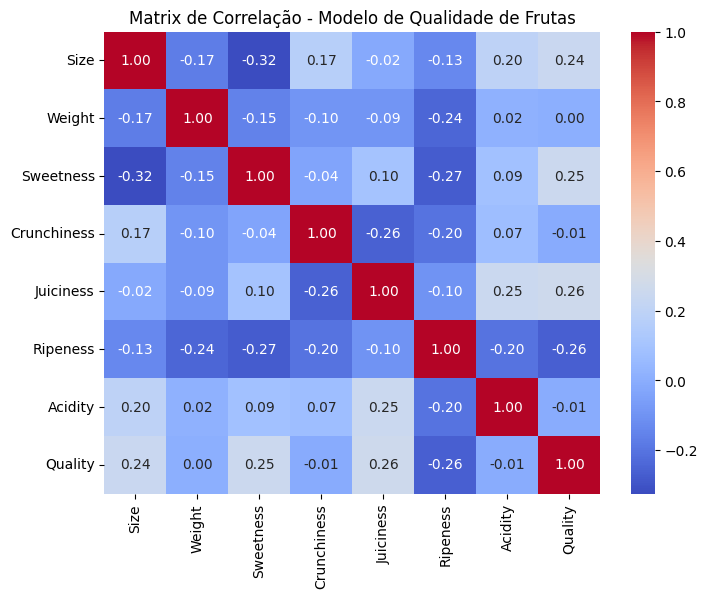

In [23]:
# plotar matrix de Correlação
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix_class, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matrix de Correlação - Modelo de Qualidade de Frutas")
plt.show()

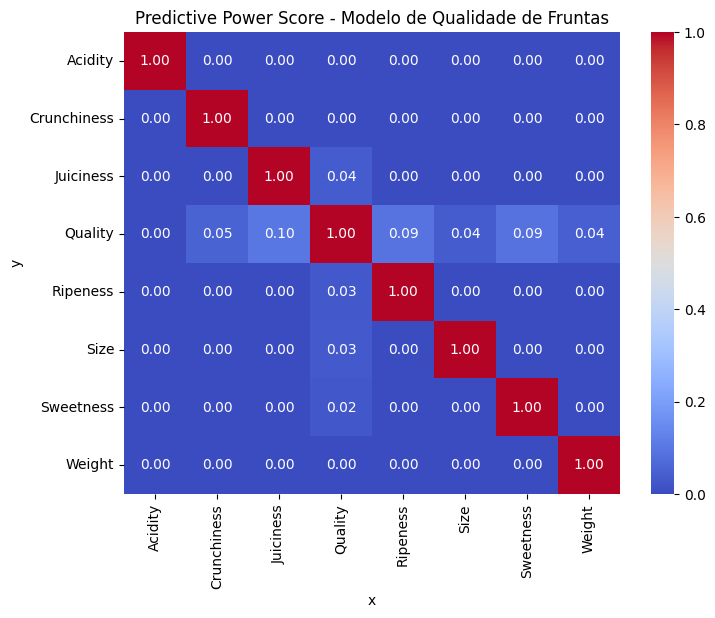

In [24]:
# plotar matrix de PPS
plt.figure(figsize=(8, 6))
sns.heatmap(pps_matrix_reg_pivot_class, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Predictive Power Score - Modelo de Qualidade de Fruntas")
plt.show()

In [25]:
# calcular modelo entre 2 variáveis 
pps.score(df_pps_2, 'Size', "Quality")

{'x': 'Size',
 'y': 'Quality',
 'ppscore': 0.035821643286573224,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 0.499,
 'model_score': 0.48112499999999997,
 'model': DecisionTreeRegressor()}

In [26]:
# separar x e y
X = df_pps_2.drop('Quality', axis=1)
y = df_pps_2['Quality']

# treinar modelo de regressão linar múltipla
model_logreg_quality_fruits = LogisticRegression()
model_logreg_quality_fruits.fit(X, y)

LogisticRegression()

Text(0.5, 1.0, 'Importâncias das Features na Regressão Logística')

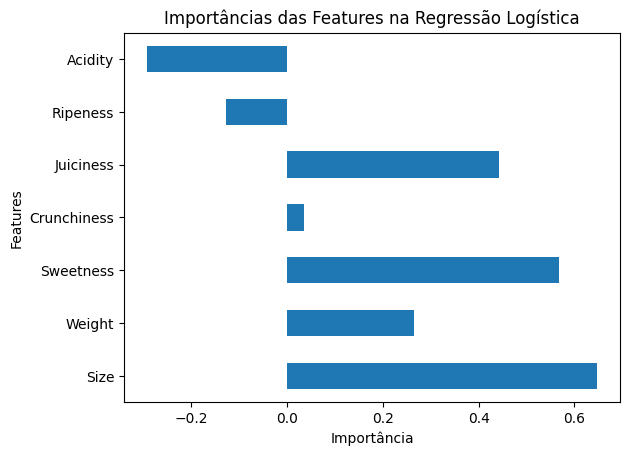

In [29]:
# Avaliar a importância das features com base nos coeficientes de modelo
# na Regressão logísitca - a correlação entre as features, vem numa lista - `coef_[0]`
feat_importance_class = pd.Series(
    model_logreg_quality_fruits.coef_[0], index=X.columns)
feat_importance_class.plot(kind='barh')
plt.xlabel("Importância")
plt.ylabel("Features")
plt.title("Importâncias das Features na Regressão Logística")